___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://www.retailtouchpoints.com/wp-content/uploads/2020/09/Walmart-Redesign-exterior.jpg" width="300px" height="180px" />


# <font color= #bbc28d> **Stock Exchange Forecasting** </font>
#### <font color= #2E9AFE> `Lab 3 - Machine Learning`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez, Isabel Valladolid & Vivienne Toledo </Strong>
- <Strong> Fecha </Strong>: 20/11/2025.

___

<p style="text-align:right;"> Image retrieved from: https://www.retailtouchpoints.com/wp-content/uploads/2020/09/Walmart-Redesign-exterior.jpg</p>

# <font color= #bbc28d> **Introduction** </font>

Stock forecasting is one of the most important fields in finance, since **accurate predictions allow for better and more precise decision-making capabilites where investments are involved**. In this sense, data science integration via time series analysis and modeling are essential.

Intending to make use of some popular neural network models and their relevance to finance, this notebook covers the use of **Recurrent Neural Networks (RNN's) for stock exchange forecasting**, focusing on Walmart's stocks over the past 5 years. 

Two baseline models (naïve and moving average) will be compared to two RNN's models (RNN and LSTM) to evaluate performance and prediction power. The objective is to identify the best approach and manner to carry out predictions in the field of stock forecasting.

----

In [5]:
# === IMPORTS ===

# Generales
import random
import csv
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Redes Neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision.models import alexnet, AlexNet_Weights, vgg16, VGG16_Weights
from torchvision import transforms
from torch.nn.init import kaiming_uniform_, xavier_uniform_, orthogonal_, zeros_

# Time Series Analysis
import mplfinance as mpf
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# <font color= #bbc28d> **Data Loading** </font>

Using the library _yfinance_, the stocks of Walmart in the last five years were downloaded on 14/nov/2025. Open, High, Low, Close and Volume (OHLCV) fields were selected for the download, which will be the features used for model training and evaluation.

In [56]:
# # RUN THIS CODE ONLY ONE TIME
# start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')          # Gets last 5 years of data
# end_date = datetime.now().strftime('%Y-%m-%d')

# # Download Walmart prices
# wmt = yf.download('WMT', start=start_date, end=end_date, progress=True)

# # Flatten columns to get only data
# wmt.columns = wmt.columns.get_level_values(0)

# # Keep OHLCV data
# wmt = wmt[['Open', 'High', 'Low', 'Close', 'Volume']]

# # Save to csv
# wmt.to_csv('data/walmart_stocks.csv', index=True)

In [2]:
# Read data
df = pd.read_csv('data/walmart_stocks.csv')
df['Date'] = pd.to_datetime(df['Date'])             # Convert Date column to date type
df = df.set_index('Date')                           # Make the Date column the index
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-16,46.804732,47.697108,46.416065,47.398613,34560300
2020-11-17,46.795404,47.647361,46.384971,46.444050,42711600
2020-11-18,46.596410,47.159198,46.344554,46.356991,24936900
2020-11-19,46.472042,47.401731,46.428512,47.299126,18590700
2020-11-20,47.003731,47.498113,46.580864,46.714565,21937200


# <font color= #bbc28d> **Data Visualization** </font>

For starters, after pulling down Walmart's stock exchange data of the last 5 years, let's take a quick look at the data: 

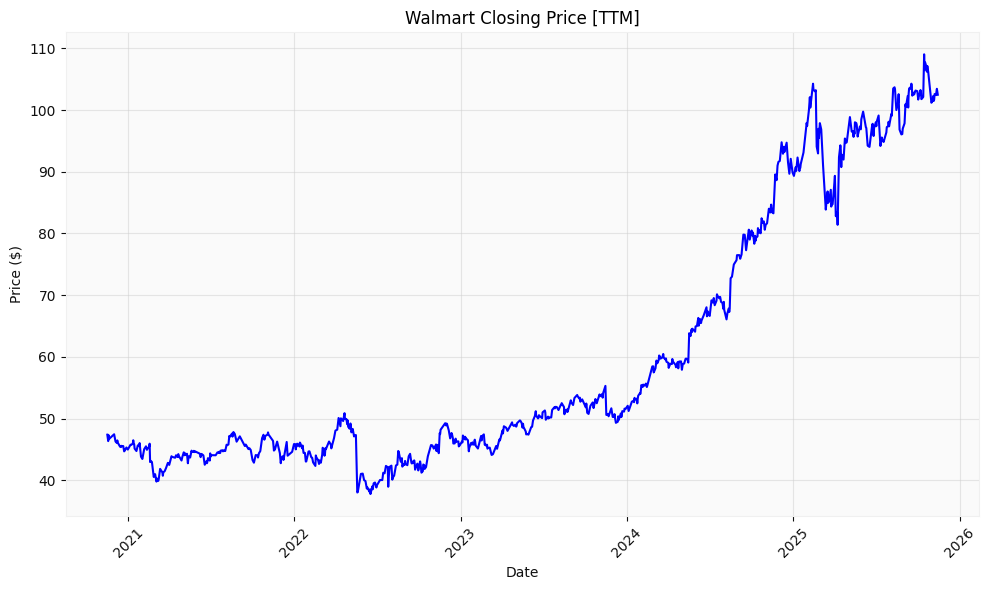

In [58]:
# Initialize an empty figure
plt.figure(figsize=(10, 6))
plt.grid(alpha=0.5)

# Plot the closing prices
plt.plot(
    df.index,
    df["Close"],
    color="blue",
    linewidth=1.5
)

# Set the plot title and axis labels
plt.title(f"Walmart Closing Price [TTM]")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# Finish constructing the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

As observed in the chart, Walmart's stock had been quite stable until around 2023, experiencing a sharp increase the following years.

<br>

Let's take a closer look at Walmart's stock behaviour via OHLCV data analysis with candlesticks charts, which showcase the relationship between OHLCV:

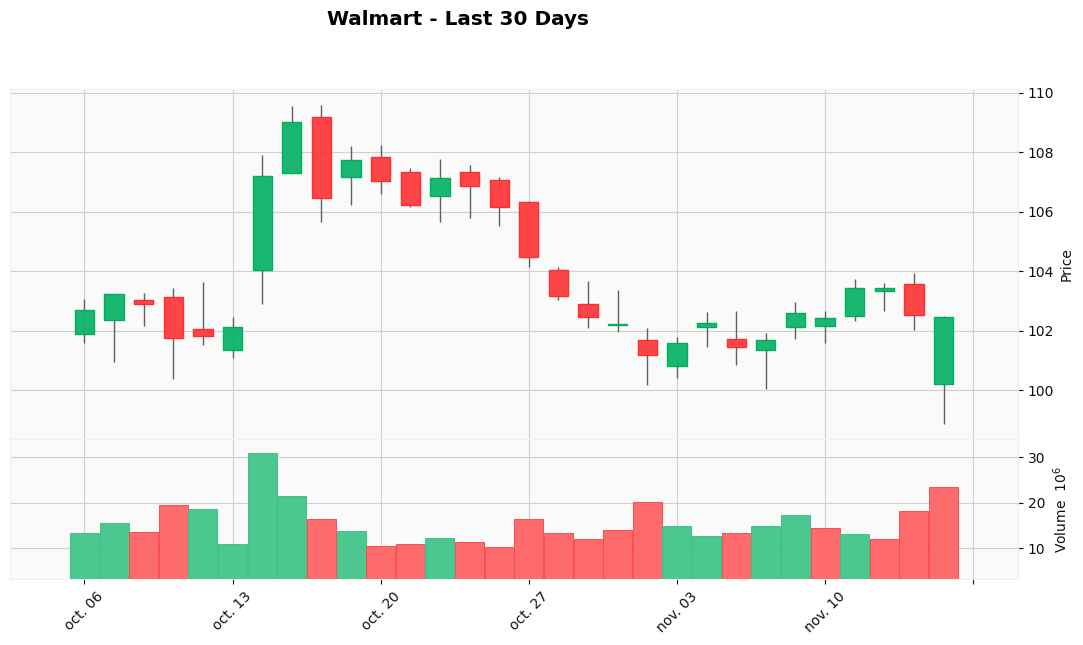

In [59]:
# Select last 30 days of data 
df_latest = df.tail(30)

# plot the latest data, thereby creating a "zoomed in" version of the plot
mpf.plot(
    df_latest,
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    volume=True,
    title=f"Walmart - Last 30 Days"
)


In the last 30 days, Walmart's stock has been experiencing quite a decrease in value, with varying prices.

# <font color= #bbc28d> **Preprocessing** </font>

Although there doesn't seem to be any missing data from the visualizations provided, let's further evaluate if the data contains any NaN values:

In [4]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Since there are no NaN values, the data is good to go through further preprocessing techniques. 

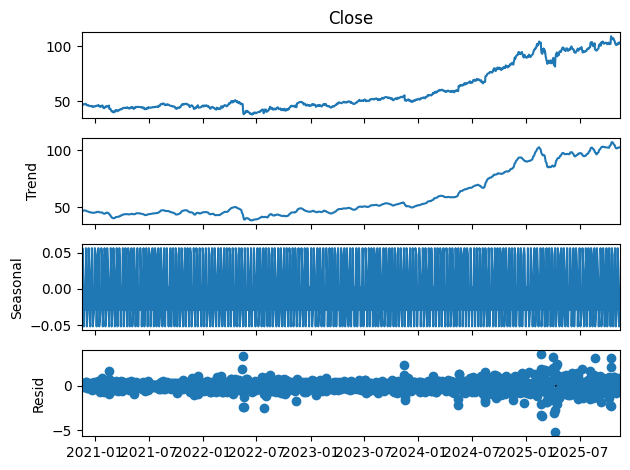

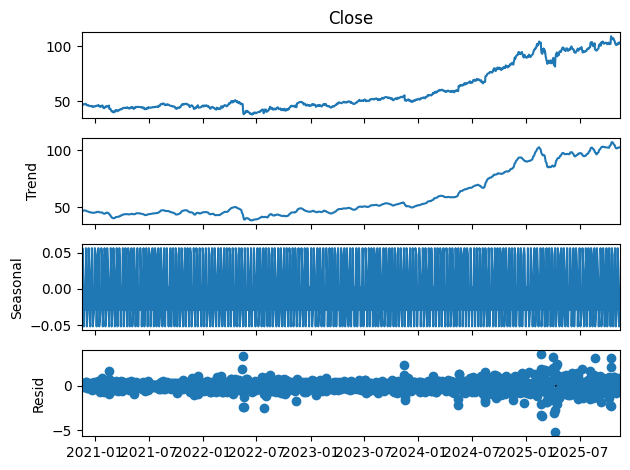

In [13]:
series_decompose = seasonal_decompose(df['Close'], model='additive', period=7)
series_decompose.plot()

Since data is derived from a time series, a MinMax Scaler is recommended for preprocessing.

- **[PENDIENTE]** Deberíamos tmb checar atípicos pero no entendí series de tiempo alch

# <font color= #bbc28d> **Baseline** </font>

The baseline models selected to be compared against RNN architectures are _**Naïve**_ and _**Moving Average**_. The results of these models will be compared to the RNN architectures proposed later in this notebook.

- **[NOTA]** Por qué diablos estamos utilizando Naïve como baseline? claramente its going to suck. quizás valdría la pena usar ARIMA? ya sabemos que las instrucciones are questionable at best

## <font color= #66b0b0> &ensp; • **Naïve (ESTAMOS SEGURES?)** </font> 

## <font color= #66b0b0> &ensp; • **Moving Average** </font>

# <font color= #bbc28d> **Modeling** </font>

## <font color= #66b0b0> &ensp; • **Vanilla RNN (abierto a cambio)** </font>

## <font color= #66b0b0> &ensp; • **LSTM** </font>

# <font color= #bbc28d> **Bibliography** </font>

- https://pythonfintech.com/articles/plotting-stock-charts-ohlc-matplotlib-mplfinance